In [1]:
import os
import numpy as np
import tables
import matplotlib as mpl; mpl.use('TkAgg')
import matplotlib.pyplot as plt
import math
%matplotlib inline  



tau_type = '1p1n'
h5_filename = os.path.join(
    os.getenv('DATA_AREA'), 'tauid_ntuples', 'v11', 'test', 'output.selected.h5')

# h5file = File(h5_filename, mode='r')
# rec = h5file.get('rec_' + tau_type)

h5file = tables.open_file(h5_filename)
records = getattr(h5file.root,  'tree_' + tau_type)

/Users/quentin/software/imaging_ve/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
records

/tree_1p1n (Table(551,), shuffle, zlib(5)) 'tau'
  description := {
  "runnumber": Int32Col(shape=(), dflt=0, pos=0),
  "eventnumber": UInt64Col(shape=(), dflt=0, pos=1),
  "lumiblock": Int32Col(shape=(), dflt=0, pos=2),
  "coreflags": Int32Col(shape=(), dflt=0, pos=3),
  "npv": Int32Col(shape=(), dflt=0, pos=4),
  "good_npv": Int32Col(shape=(), dflt=0, pos=5),
  "averageintpercrossing": Float32Col(shape=(), dflt=0.0, pos=6),
  "actualintpercrossing": Float32Col(shape=(), dflt=0.0, pos=7),
  "prescale": Float32Col(shape=(), dflt=0.0, pos=8),
  "mc_event_weight": Float32Col(shape=(), dflt=0.0, pos=9),
  "pu_weight": Float32Col(shape=(), dflt=0.0, pos=10),
  "met": Float32Col(shape=(), dflt=0.0, pos=11),
  "met_significance": Float32Col(shape=(), dflt=0.0, pos=12),
  "true_pt": Float32Col(shape=(), dflt=0.0, pos=13),
  "true_eta": Float32Col(shape=(), dflt=0.0, pos=14),
  "true_phi": Float32Col(shape=(), dflt=0.0, pos=15),
  "true_m": Float32Col(shape=(), dflt=0.0, pos=16),
  "true_npron

In [3]:
index = 340
rec = records[index]



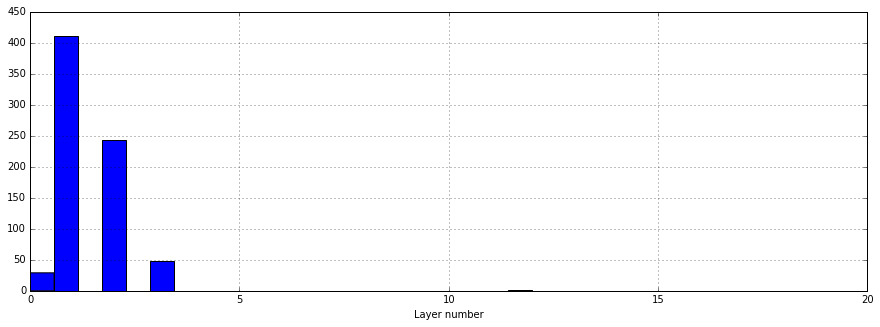

In [4]:
layers_ind = np.where(rec['off_cells_samp'] != -1)
layers = rec['off_cells_samp'].take(layers_ind[0])

plt.rcParams["figure.figsize"] = (15, 5)
_, _, _ = plt.hist(layers, 21)
plt.xlabel('Layer number')
plt.xlim(0, 20)
#plt.axis([i for i in range(20)])
plt.grid(True)

plt.show()
#print np.sort(layers)

In [5]:
def tau_image_clus(rec, layer):
    indices = np.where(rec['off_cells_samp'] == layer)
    ene_ = rec['off_cells_e_norm'].take(indices[0])
    eta_ = rec['off_cells_deta_digit'].take(indices[0])
    phi_ = rec['off_cells_dphi_digit'].take(indices[0])
    eta_r_ = rec['off_cells_deta'].take(indices[0])
    phi_r_ = rec['off_cells_dphi'].take(indices[0])
    image = [[0 for j in range(width)] for i in range(height)]
    print indices
    print eta_[0]
    print phi_[0]
    for eta, phi, ene in zip(eta_, phi_, ene_):
        eta_ind = int(eta + math.floor(width / 2))
        phi_ind = int(phi + math.floor(height / 2))
        print
        print eta, eta_ind
        print phi, phi_ind
        # print eta_ind, phi_ind, ene
        if eta_ind < width  and eta_ind > 0 and phi_ind < height and phi_ind > 0:
            image[phi_ind][eta_ind] = ene
    image = np.asarray(image)
    return eta_, phi_, eta_r_, phi_r_, ene_, image



(array([  0,   1,   2,   3,   4,   5,  11,  12,  13,  14,  15,  22,  23,
        24,  25,  32,  33,  34,  35,  36,  37,  38,  39,  50,  51,  52,
        53,  54,  55,  56,  57,  68,  69,  70,  71,  72,  73,  74,  75,
        77,  78,  79,  82,  83,  84,  85, 103, 104, 105, 106, 107, 108,
       109, 110, 112, 113, 114, 115, 116, 117, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 174, 175, 176, 177, 178, 179,
       180, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 202, 203,
       205, 209, 210, 211, 212, 213, 214, 215, 216, 217, 223, 224, 225,
       226, 227, 228, 229, 235, 244, 245, 246, 247, 248, 254, 255, 256,
       257, 258, 259, 261, 262, 263, 264, 265, 266, 281, 282, 283, 284,
       285, 286, 287, 288, 299, 300, 301, 302, 303, 304, 311, 312, 313,
       314, 315, 316, 317, 318, 329, 330, 331, 332, 333, 334, 3

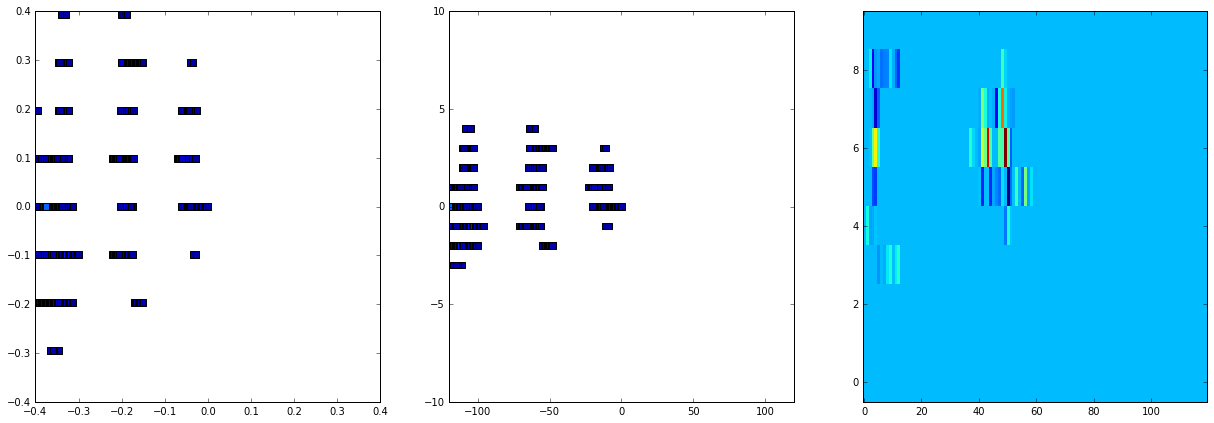

In [6]:
plt.rcParams["figure.figsize"] = (21, 7)

layer, width, height, w_r, h_r = 1, 120, 10, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)




f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width, width)
axarr[1].set_ylim(-height, height)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()



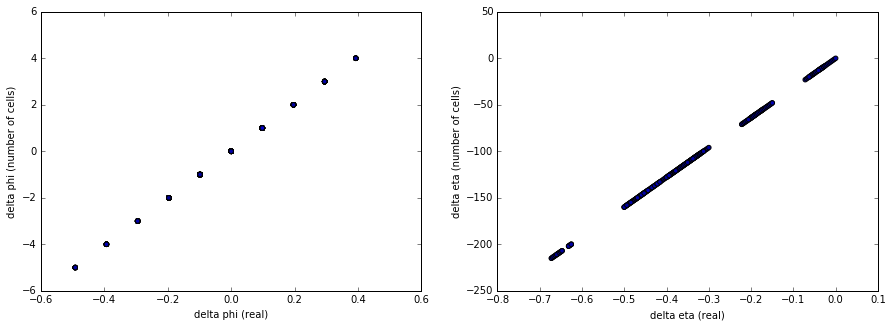

In [7]:
plt.rcParams["figure.figsize"] = (15, 5)
f, axarr = plt.subplots(1, 2)
axarr[0].scatter(phi_r_, phi_, c=ene_)
axarr[0].set_xlabel('delta phi (real)')
axarr[0].set_ylabel('delta phi (number of cells)')
axarr[1].scatter(eta_r_, eta_, c=ene_)
axarr[1].set_xlabel('delta eta (real)')
axarr[1].set_ylabel('delta eta (number of cells)')
plt.show()
plt.rcParams["figure.figsize"] = (21, 7)


(array([  7,   8,   9,  10,  16,  17,  18,  19,  20,  21,  27,  28,  29,
        30,  31,  41,  42,  43,  44,  45,  46,  47,  48,  49,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  81,  95,  96,  97,  98,  99,
       100, 101, 102, 119, 120, 121, 122, 142, 143, 144, 145, 159, 170,
       171, 172, 173, 182, 183, 184, 185, 196, 197, 198, 199, 200, 201,
       207, 208, 219, 220, 221, 222, 231, 232, 233, 234, 237, 238, 239,
       240, 241, 242, 243, 250, 251, 252, 253, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 290, 291, 292, 294, 295,
       296, 297, 298, 306, 307, 308, 309, 310, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 345, 346, 347, 359, 360, 370, 378, 381, 386,
       387, 390, 395, 401, 403, 404, 410, 415, 416, 417, 418, 419, 420,
       421, 422, 423, 424, 425, 426, 427, 437, 438, 439, 440, 441, 451,
       452, 453, 457, 458, 459, 460, 468, 469, 470, 471, 472, 491, 492,
       493, 506, 509, 517, 518, 519, 520, 521, 522, 523, 524, 5

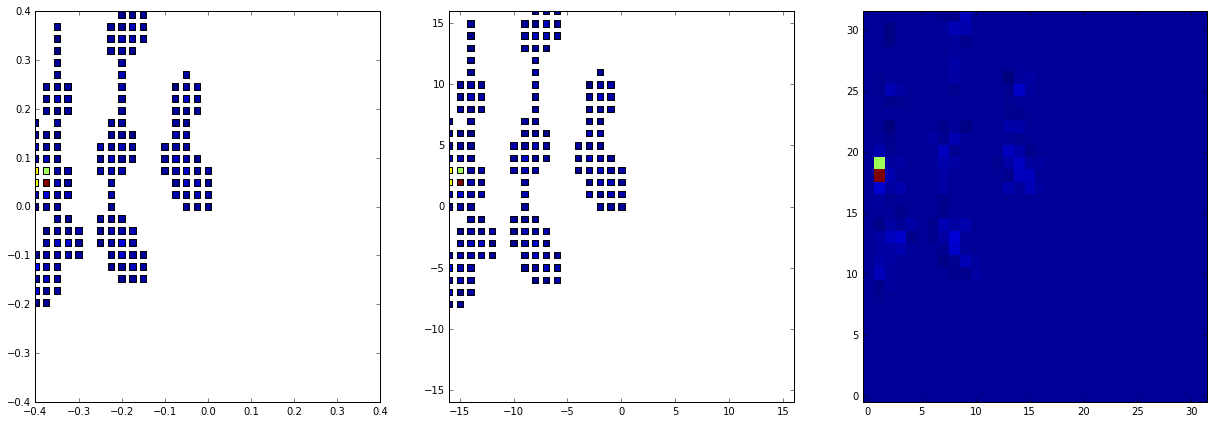

In [8]:
layer, width, height, w_r, h_r = 2, 32, 32, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

tracks_ind = np.where(rec['off_tracks_deta_digit'] != -1111)
tracks_eta_ = rec['off_tracks_deta_digit'].take(tracks_ind[0])
tracks_eta_r_ = rec['off_tracks_deta'].take(tracks_ind[0])
tracks_phi_ = rec['off_tracks_dphi_digit'].take(tracks_ind[0])
tracks_phi_r_ = rec['off_tracks_dphi'].take(tracks_ind[0])

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].scatter(tracks_eta_r_, tracks_phi_r_, marker='^', s=200, color='green')
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].scatter(tracks_eta_, tracks_phi_, marker='^', s=200, color='green')
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()

In [9]:
tracks_ind = np.where(rec['off_tracks_deta_digit'] != -1111)
tracks_eta = rec['off_tracks_deta_digit'].take(tracks_ind[0])
tracks_eta_r = rec['off_tracks_deta'].take(tracks_ind[0])
print tracks_ind
print tracks_eta
#plt.rcParams["figure.figsize"] = (15, 15)
#plt.scatter(eta_, phi_, c=ene_, marker='s', size='40')
#plt.show()
#plt.rcParams["figure.figsize"] = (21, 7)


(array([0, 1]),)
[-17 -17]


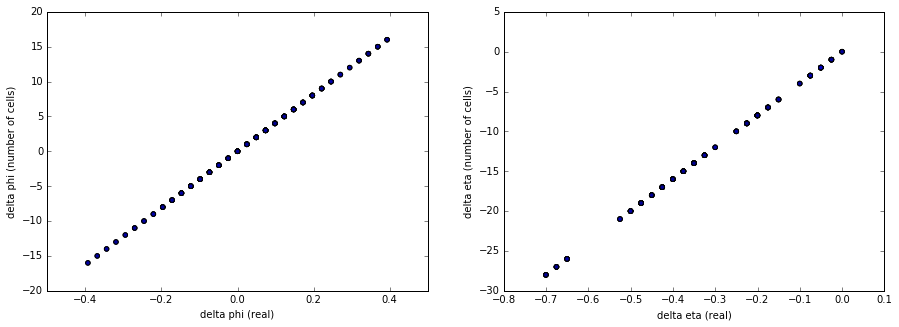

In [10]:
plt.rcParams["figure.figsize"] = (15, 5)
f, axarr = plt.subplots(1, 2)
axarr[0].scatter(phi_r_, phi_, c=ene_)
axarr[0].set_xlabel('delta phi (real)')
axarr[0].set_ylabel('delta phi (number of cells)')
axarr[1].scatter(eta_r_, eta_, c=ene_)
axarr[1].set_xlabel('delta eta (real)')
axarr[1].set_ylabel('delta eta (number of cells)')
plt.show()
plt.rcParams["figure.figsize"] = (21, 7)



(array([ 26,  40,  58,  76,  86,  87,  88,  89,  90,  91,  92,  93, 111,
       123, 204, 249, 260, 289, 293, 305, 319, 337, 356, 369, 375, 391,
       406, 436, 450, 461, 480, 534, 548, 563, 573, 577, 578, 579, 580,
       610, 614, 615, 627, 691, 702, 712, 714, 732]),)
-3
13

-3 5
13 29

-3 5
14 30

-13 -5
6 22

-13 -5
0 16

-13 -5
-1 15

-13 -5
1 17

-14 -6
0 16

-12 -4
0 16

-14 -6
-1 15

-12 -4
-1 15

-14 -6
1 17

-12 -4
1 17

-9 -1
-10 6

-9 -1
-11 5

-6 2
8 24

-3 5
4 20

-4 4
3 19

-3 5
-4 12

-3 5
-5 11

-4 4
-3 13

-3 5
-6 10

-9 -1
-5 11

-8 0
-5 11

-8 0
-6 10

-9 -1
-6 10

-8 0
-7 9

-8 0
-2 14

-7 1
-6 10

-7 1
-7 9

-7 1
-8 8

-6 2
-4 12

-7 1
1 17

-7 1
2 18

-7 1
0 16

-6 2
1 17

-6 2
2 18

-8 0
1 17

-8 0
0 16

-8 0
2 18

-7 1
3 19

-8 0
3 19

-6 2
3 19

-7 1
4 20

-1 7
3 19

0 8
8 24

0 8
1 17

0 8
2 18

0 8
0 16


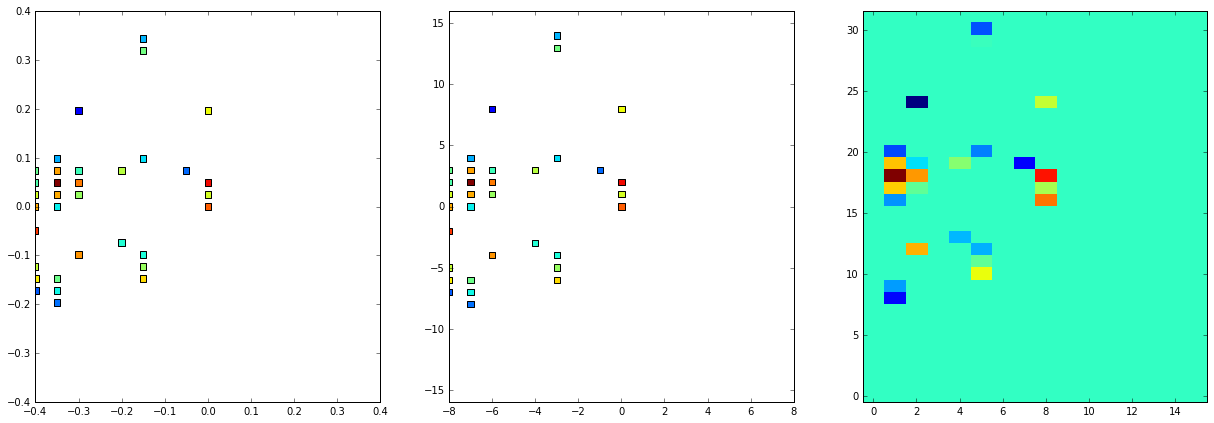

In [11]:
layer, width, height, w_r, h_r = 3, 16, 32, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()

(array([ 94, 581]),)
-3
0

-3 1
0 4

0 4
0 4


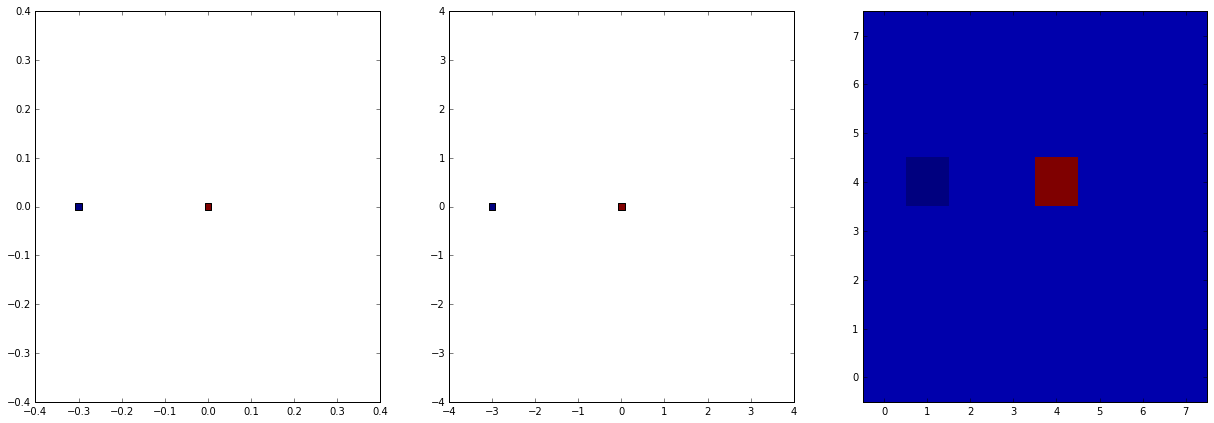

In [12]:
layer, width, height, w_r, h_r = 12, 8, 8, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2 , width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()


In [13]:
layer, width, height, w_r, h_r = 13, 8, 8, 0.4, 0.4
eta_, phi_, eta_r_, phi_r_, ene_, image = tau_image_clus(rec, layer)

f, axarr = plt.subplots(1, 3)
axarr[0].scatter(eta_r_, phi_r_, c=ene_, marker='s', s=40)
axarr[0].set_xlim(-w_r, w_r)
axarr[0].set_ylim(-h_r, h_r)
axarr[1].scatter(eta_, phi_, c=ene_, marker='s', s=40)
axarr[1].set_xlim(-width / 2, width / 2)
axarr[1].set_ylim(-height / 2, height / 2)
axarr[2].imshow(image, origin='lower', interpolation='nearest', aspect='auto')
plt.show()


(array([], dtype=int64),)


IndexError: index 0 is out of bounds for axis 0 with size 0